# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"  

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid=656b35070df99a5a7cbf776c97aaa79f&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except :
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | santa catalina
Processing Record 7 of Set 1 | cestos city
Processing Record 8 of Set 1 | sao joao do piaui
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | callao
Processing Record 11 of Set 1 | piti village
Processing Record 12 of Set 1 | puerto san carlos
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | muynoq
Processing Record 15 of Set 1 | midvagur
Processing Record 16 of Set 1 | fuvahmulah
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | el calafate
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | anadyr
Processing Record 22 of Set 1 | college
Pro

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,65.52,51,34,9.44,AU,1737866183
1,ushuaia,-54.8000,-68.3000,47.86,87,20,10.36,AR,1737866184
2,lihue,21.9789,-159.3672,74.79,73,40,10.36,US,1737866185
3,ancud,-41.8697,-73.8203,55.13,93,14,4.07,CL,1737866186
4,georgetown,5.4112,100.3354,87.75,70,20,5.75,MY,1737865929


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,65.52,51,34,9.44,AU,1737866183
1,ushuaia,-54.8000,-68.3000,47.86,87,20,10.36,AR,1737866184
2,lihue,21.9789,-159.3672,74.79,73,40,10.36,US,1737866185
3,ancud,-41.8697,-73.8203,55.13,93,14,4.07,CL,1737866186
4,georgetown,5.4112,100.3354,87.75,70,20,5.75,MY,1737865929


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

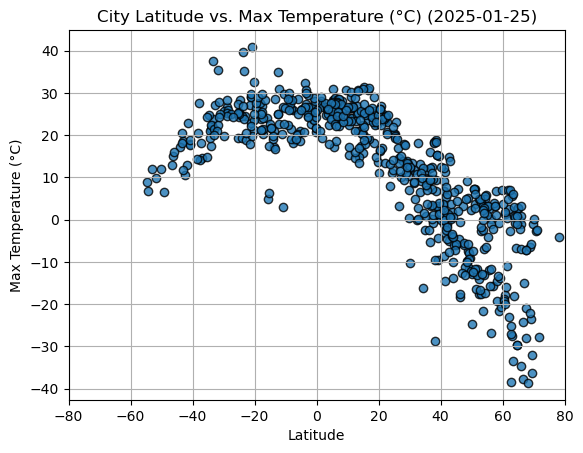

In [21]:
# Build scatter plot for latitude vs. temperature
city_data_df["Max Temp (°C)"] = (city_data_df["Max Temp"] - 32) * 5/9
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (°C)"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C) (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 80])

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

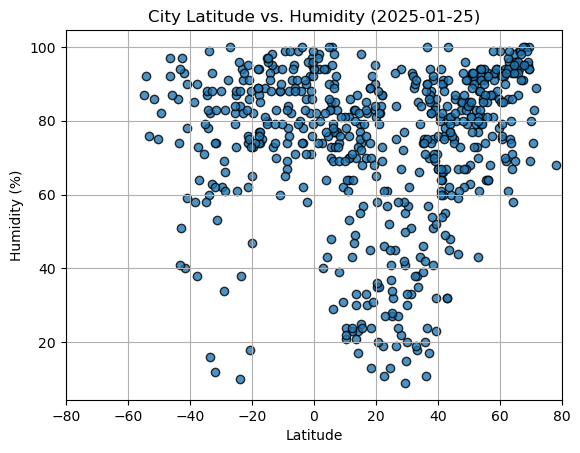

In [22]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 80])

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

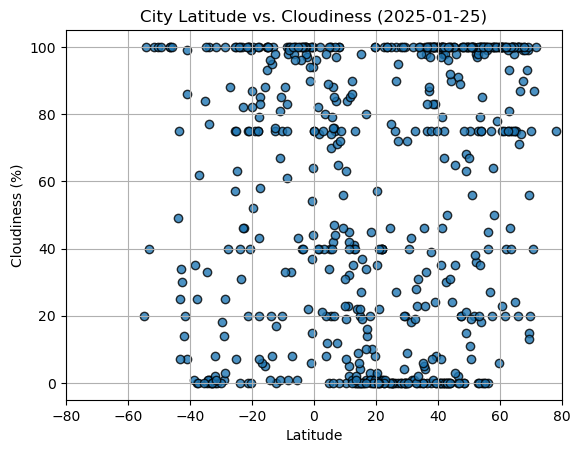

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 80])

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

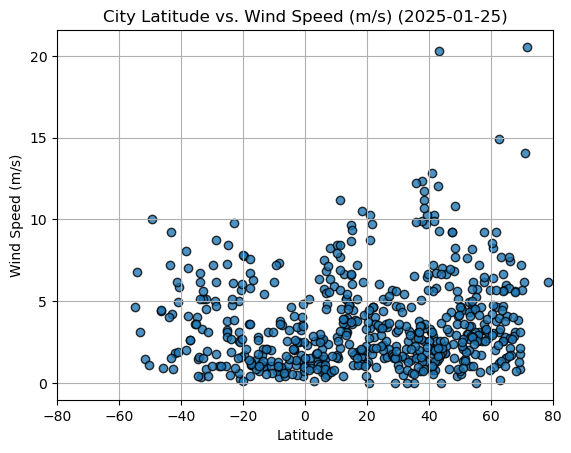

In [24]:
# Convert wind speed from mph to m/s
city_data_df["Wind Speed (m/s)"] = city_data_df["Wind Speed"] * 0.44704

# Build the scatter plots for latitude vs. wind speed (using m/s)
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed (m/s)"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s) (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 80])

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col, x_label, y_label, title):
    x_values = df[x_col]
    y_values = df[y_col]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = f"The r^2-value is: {round(rvalue**2, 3)}"
    print(r_squared)
    plt.annotate(line_eq, (min(x_values),max(y_values)-10),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

    

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (°C),Wind Speed (m/s)
City_ID,,,,,,,,,,,
2,lihue,21.9789,-159.3672,74.79,73,40,10.36,US,1737866185,23.772222,4.631334
4,georgetown,5.4112,100.3354,87.75,70,20,5.75,MY,1737865929,30.972222,2.570480
5,santa catalina,9.3337,122.8637,87.26,62,56,13.20,PH,1737866188,30.700000,5.900928
6,cestos city,5.4600,-9.5828,76.91,85,100,3.22,LR,1737866189,24.950000,1.439469
10,piti village,13.4626,144.6933,87.31,70,0,6.91,GU,1737866194,30.727778,3.089046


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (°C),Wind Speed (m/s)
City_ID,,,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,65.52,51,34,9.44,AU,1737866183,18.622222,4.220058
1,ushuaia,-54.8000,-68.3000,47.86,87,20,10.36,AR,1737866184,8.811111,4.631334
3,ancud,-41.8697,-73.8203,55.13,93,14,4.07,CL,1737866186,12.850000,1.819453
7,sao joao do piaui,-8.3581,-42.2467,70.56,84,1,0.87,BR,1737866191,21.422222,0.388925
8,puerto natales,-51.7236,-72.4875,49.60,86,100,3.27,CL,1737866192,9.777778,1.461821


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.704


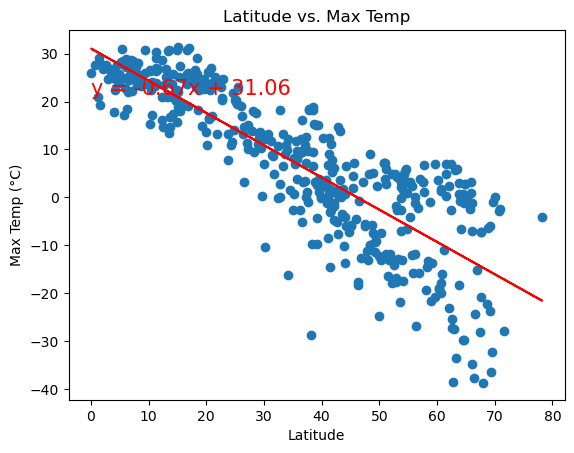

In [51]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp (°C)", "Latitude", "Max Temp (°C)", "Latitude vs. Max Temp")


The r^2-value is: 0.171


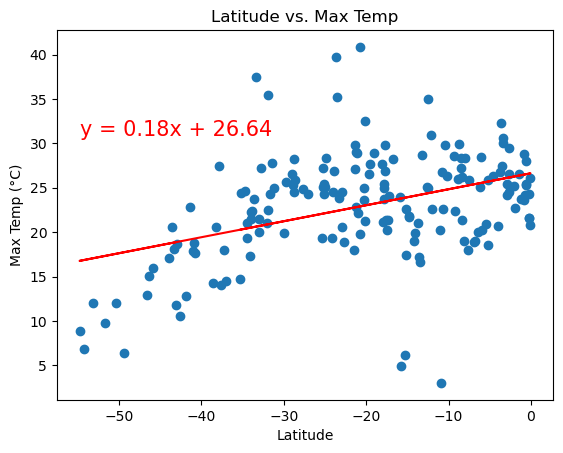

In [52]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp (°C)", "Latitude", "Max Temp (°C)", "Latitude vs. Max Temp")

**Discussion about the linear relationship: **
For north hemisphere, max temperature is having negative regression vs. latitude: higher the latitude is, lower the max temp
For south hemisphere, the trend is opposite that higher the latitude is, higher the max temp
However, north hemisphere is showing much better linear regression with a r square value of 0.704, while south hemisphere is having much lower regression coefficient (0.18). South hemisphere locations max temp are mostly falls within the range of 17-27 degree C. This indicates south hemisphere temperature vs latitude correlation may not be linear.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.113


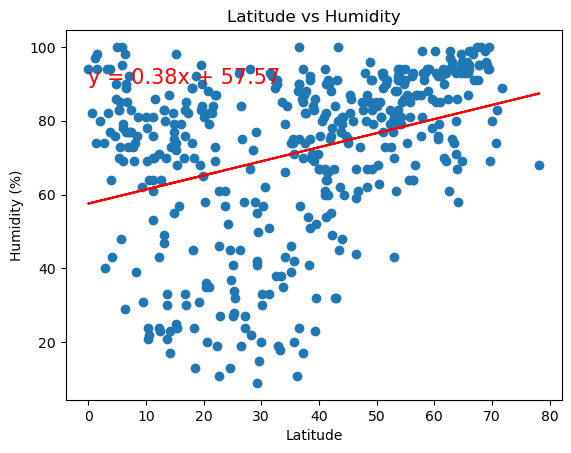

In [53]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity (%)", "Latitude vs Humidity")


The r^2-value is: 0.049


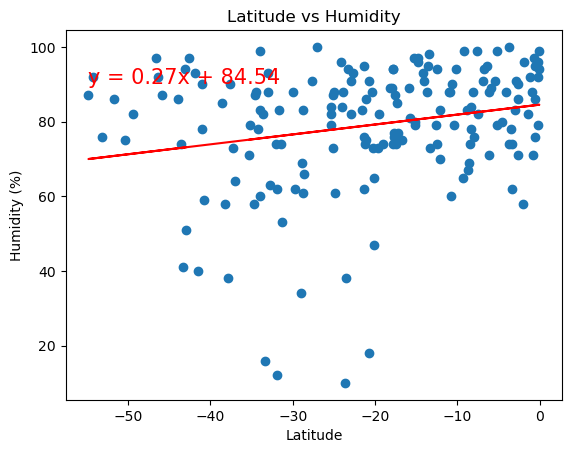

In [54]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity (%)", "Latitude vs Humidity")

**Discussion about the linear relationship:** 
Both north hemisphere and south hemisphere are showing two trends: 1. positive correlation vs. latitude; 2. only low latitude have locations having low humidity under 40% RH.
Both dataset have significant amount of data points far away from regression at low latitude locations, indicating less linear correlation at low latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.109


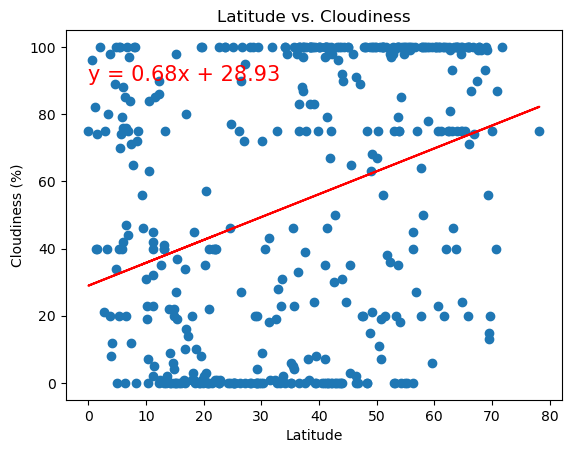

In [55]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness (%)", "Latitude vs. Cloudiness")

The r^2-value is: 0.068


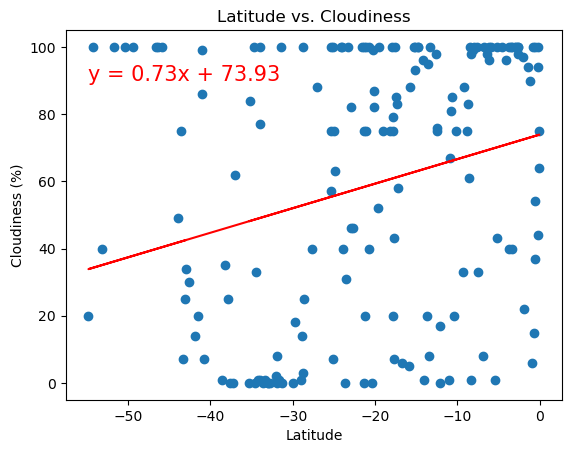

In [56]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness (%)", "Latitude vs. Cloudiness")

**Discussion about the linear relationship:** 
Both north and south hemisphere data are showing a positive correlation between latitude vs. cloudiness, with low regression coefficient (0.06-0.1). From the scatter plots, it is obvious that both graphs are having many locations with 0% or 100% cloudiness across the latitude. This means the correlation can not be simply concluded as a linear relationship between the two factors. This correlation is not conclusive enough as linear.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.015


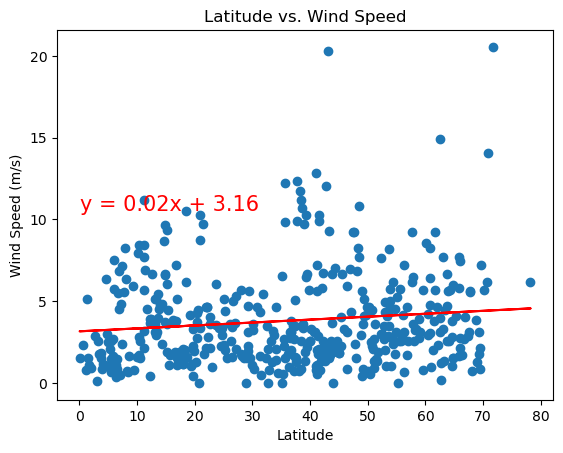

In [57]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed (m/s)", "Latitude", "Wind Speed (m/s)", "Latitude vs. Wind Speed")

The r^2-value is: 0.106


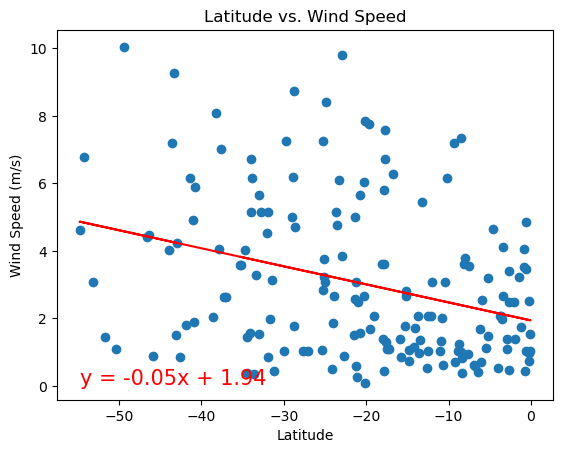

In [58]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed (m/s)", "Latitude", "Wind Speed (m/s)", "Latitude vs. Wind Speed")

**Discussion about the linear relationship:** 
Both north and south hemisphere data are showing a relatively flat correlation between latitude vs. wind speed. Slightly, for north it is showing positive slope while south is showing slightly negative.
The regression coefficient are low (0.01-0.1). This indicates not an obvious linear correlation in this analysis.